                                Mini Project 9 : Classification_2 (Dry Bean Analysis)

In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_excel("Dry_Bean_Dataset.xlsx")

In [3]:
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


# EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [5]:
data.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

                                             No Missing Values

In [6]:
data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [7]:
data.describe(include=['O'])

,Class
count,13611
unique,7
top,DERMASON
freq,3546


In [8]:
data[data.duplicated()]

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
5505,33518,702.956,277.571399,154.305581,1.798842,0.831240,34023,206.582775,0.808383,0.985157,0.852377,0.744251,0.008281,0.001567,0.553909,0.996396,HOROZ
5509,33954,716.750,277.368480,156.356326,1.773951,0.825970,34420,207.922042,0.799482,0.986461,0.830549,0.749624,0.008169,0.001591,0.561936,0.996847,HOROZ
5548,38427,756.323,306.533886,160.591784,1.908777,0.851782,38773,221.193978,0.796976,0.991076,0.844174,0.721597,0.007977,0.001334,0.520702,0.993905,HOROZ
5554,38891,791.343,319.499996,156.869619,2.036723,0.871168,39651,222.525412,0.650025,0.980833,0.780422,0.696480,0.008215,0.001192,0.485085,0.987983,HOROZ
5599,40804,790.802,323.475648,163.287717,1.981016,0.863241,41636,227.932592,0.787570,0.980017,0.819931,0.704636,0.007928,0.001206,0.496512,0.983598,HOROZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7263,63408,1005.966,412.551649,196.337705,2.101235,0.879494,64200,284.136539,0.798791,0.987664,0.787385,0.688730,0.006506,0.000903,0.474348,0.996718,HOROZ
7278,63882,1004.206,411.263403,198.765453,2.069089,0.875452,64663,285.196579,0.754705,0.987922,0.796054,0.693465,0.006438,0.000918,0.480893,0.995010,HOROZ
7285,63948,996.497,412.297178,198.877557,2.073121,0.875971,64641,285.343867,0.777909,0.989279,0.809254,0.692083,0.006447,0.000912,0.478979,0.992981,HOROZ
7340,65766,1035.842,406.416622,207.242369,1.961069,0.860218,66698,289.371512,0.792295,0.986027,0.770237,0.712007,0.006180,0.000980,0.506954,0.994172,HOROZ


In [9]:
data = data.drop_duplicates()

print("After removing duplicates:")
print(data.shape) 


After removing duplicates:
(13543, 17)


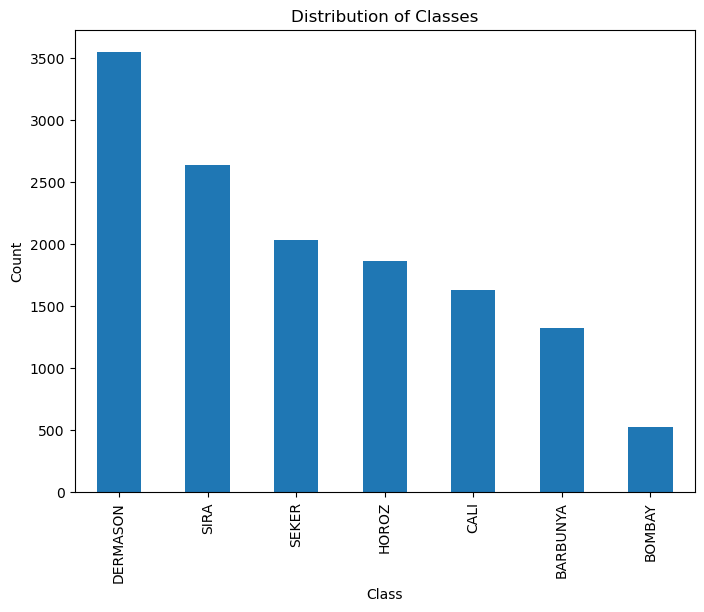

In [10]:
# Visualize the distribution of classes
plt.figure(figsize=(8, 6))
data['Class'].value_counts().plot(kind='bar')
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

 The graph below shows the different types of seed that is available in the dataset and also the number of seeds used, wherein “Dermason” has the largest amount of seeds, followed by “Sira”, then “Seker”, “Horoz”, “Cali”, “Barbunya” and lastly, “Bombay”. The varying heights of the bars indicate that the dataset has class imbalance, with some classes having more occurrences than others.

In [11]:
# Display the counts of each class
class_counts = data['Class'].value_counts()
print("Class Counts:")
print(class_counts)


Class Counts:
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64


We proceed with applying a combination of oversampling and undersampling techniques to address the class imbalance. We'll use the RandomOverSampler for oversampling and RandomUnderSampler for undersampling. After balancing the classes, we'll verify the new class distribution.

In [12]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Separate features and target variable
X = data.drop(columns=['Class'])
y = data['Class']

# Initialize oversampler and undersampler
oversampler = RandomOverSampler(random_state=42)
undersampler = RandomUnderSampler(random_state=42)

# Apply oversampling and undersampling
X_resampled, y_resampled = oversampler.fit_resample(X, y)
X_resampled, y_resampled = undersampler.fit_resample(X_resampled, y_resampled)

# Check the new class distribution
print("New Class Distribution:")
print(y_resampled.value_counts())


New Class Distribution:
BARBUNYA    3546
BOMBAY      3546
CALI        3546
DERMASON    3546
HOROZ       3546
SEKER       3546
SIRA        3546
Name: Class, dtype: int64


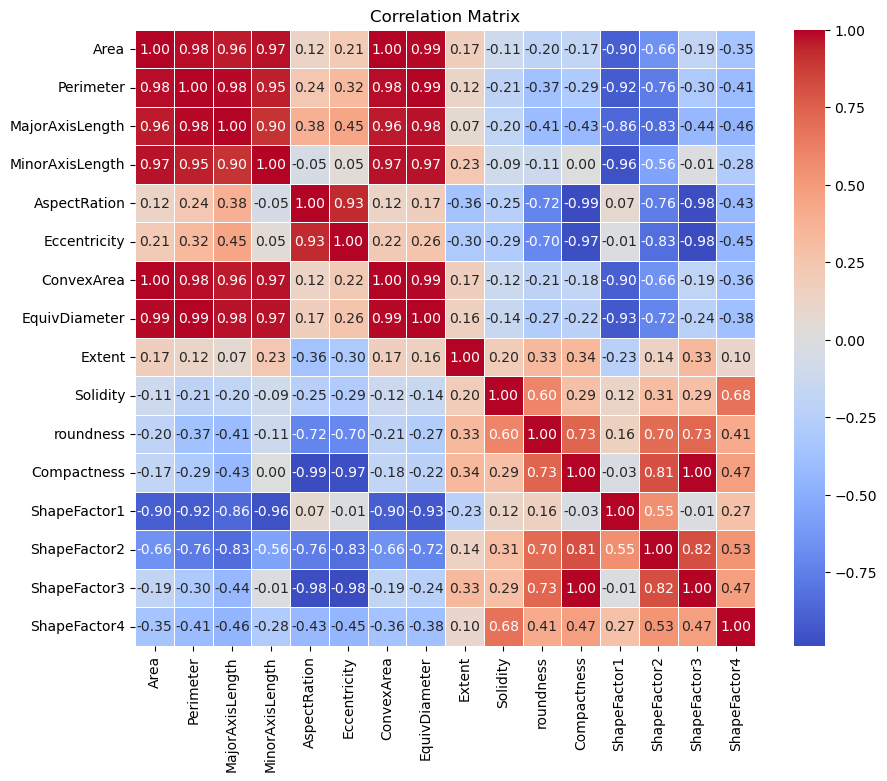

In [13]:
# Check for correlations among features
correlation_matrix = X_resampled.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


We can see that ConvexArea is directly propotional to Area,Perimeter,MajorAxisLength,MinorAxisLength and EquiDiameter and ShapeFactor 3 is Propotional to Eccentricity. 


In [14]:
# Check skewness of numerical features
skewness = X_resampled.skew()
print("Skewness of Numerical Features:")
print(skewness)

Skewness of Numerical Features:
Area               1.724424
Perimeter          1.135073
MajorAxisLength    1.014211
MinorAxisLength    1.429129
AspectRation       0.445879
Eccentricity      -1.177583
ConvexArea         1.721150
EquivDiameter      1.315229
Extent            -0.939811
Solidity          -2.070482
roundness         -0.401704
Compactness        0.183825
ShapeFactor1      -0.474364
ShapeFactor2       0.671839
ShapeFactor3       0.387081
ShapeFactor4      -2.226857
dtype: float64


To address skewness in the numerical features, we  log transformation to make the distributions more symmetric. This can help improve the performance of certain algorithms that assume normally distributed data.

In [15]:
# Set threshold for skewness
skewness_threshold = 0.5

# Identify features with skewness greater than threshold
skewed_features = skewness[abs(skewness) > skewness_threshold].index

# Apply log transformation to skewed features
X_resampled[skewed_features] = np.log1p(X_resampled[skewed_features])

# Check skewness after transformation
skewness_after_transform = X_resampled[skewed_features].skew()
print("Skewness after Log Transformation:")
print(skewness_after_transform)


Skewness after Log Transformation:
Area               0.827344
Perimeter          0.612047
MajorAxisLength    0.431397
MinorAxisLength    0.986726
Eccentricity      -1.364245
ConvexArea         0.820274
EquivDiameter      0.829069
Extent            -1.021234
Solidity          -2.094652
ShapeFactor2       0.670924
ShapeFactor4      -2.247118
dtype: float64


After applying the log transformation to the skewed features, we can see that the skewness values have been reduced compared to before.

Checking for outliers

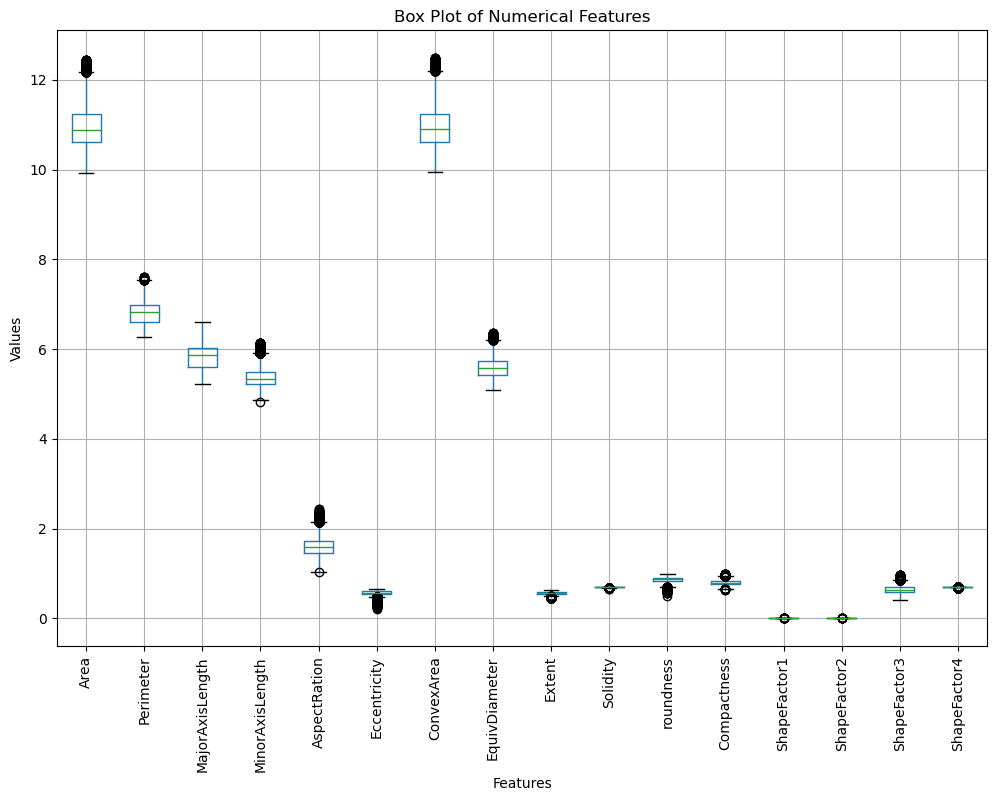

In [16]:
# Visualize outliers using box plots
plt.figure(figsize=(12, 8))
X_resampled.boxplot(rot=90)
plt.title('Box Plot of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()


Too many Outliers are present. We can not remove because we have much data falls within the outlier region. We will check the distribution of numerical features using histogram.

<Figure size 1200x800 with 0 Axes>

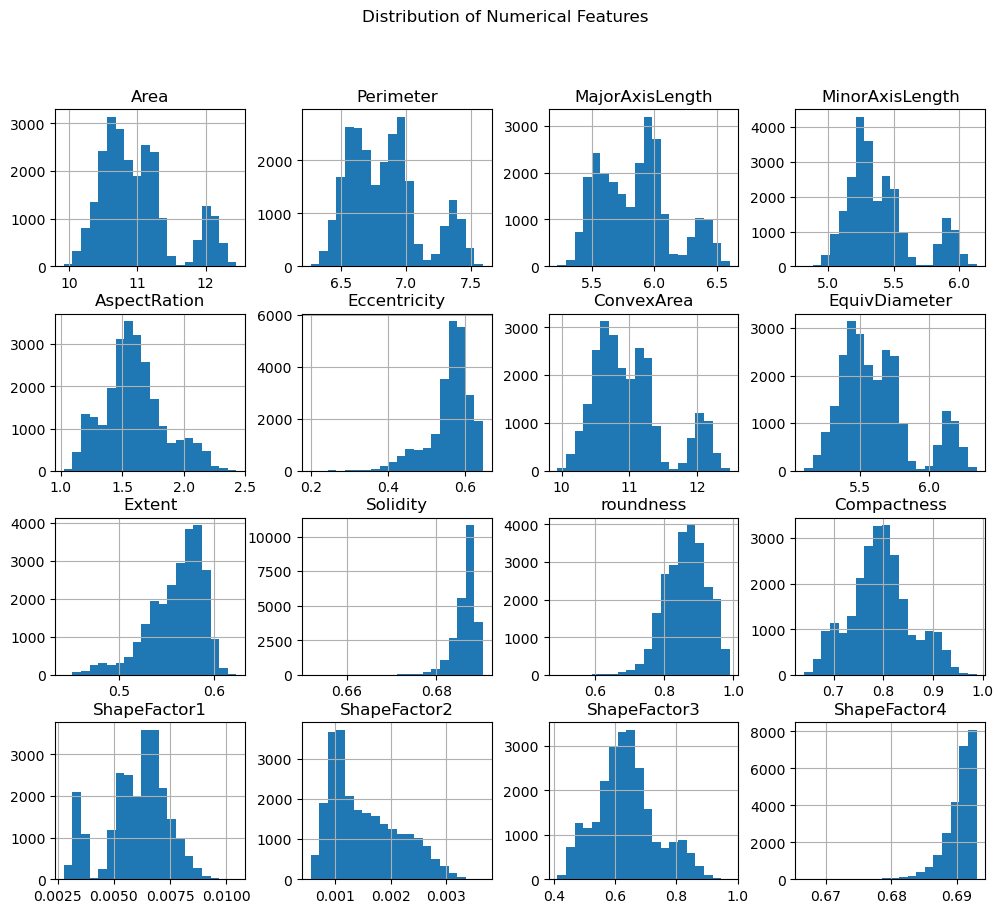

In [17]:
# Visualize the distribution of numerical features
plt.figure(figsize=(12, 8))
X_resampled.hist(bins=20, figsize=(12, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()


In [18]:
# Generate summary statistics for numerical features
summary_statistics = X_resampled.describe().transpose()

# Print the summary statistics
print("Summary Statistics for Numerical Features:")
print(summary_statistics)


Summary Statistics for Numerical Features:
                   count       mean       std       min        25%        50%  \
Area             24822.0  10.995378  0.532705  9.924319  10.605303  10.886315   
Perimeter        24822.0   6.839261  0.279823  6.264799   6.613275   6.817718   
MajorAxisLength  24822.0   5.853300  0.295402  5.218198   5.599324   5.867672   
MinorAxisLength  24822.0   5.396948  0.257447  4.816344   5.225628   5.321003   
AspectRation     24822.0   1.599548  0.246100  1.024868   1.448299   1.578603   
Eccentricity     24822.0   0.561958  0.054158  0.197991   0.544279   0.573105   
ConvexArea       24822.0  11.008819  0.533643  9.937164  10.616909  10.900658   
EquivDiameter    24822.0   5.622206  0.265468  5.089100   5.427824   5.567757   
Extent           24822.0   0.560486  0.028994  0.441678   0.543114   0.567223   
Solidity         24822.0   0.686453  0.002534  0.651932   0.685431   0.687077   
roundness        24822.0   0.862952  0.060414  0.489618   0.821098

Based on this summary, it appears that the features have different scales and distributions. Log transformation may help mitigate the influence of outliers and make the distributions more symmetric.

<Figure size 1200x800 with 0 Axes>

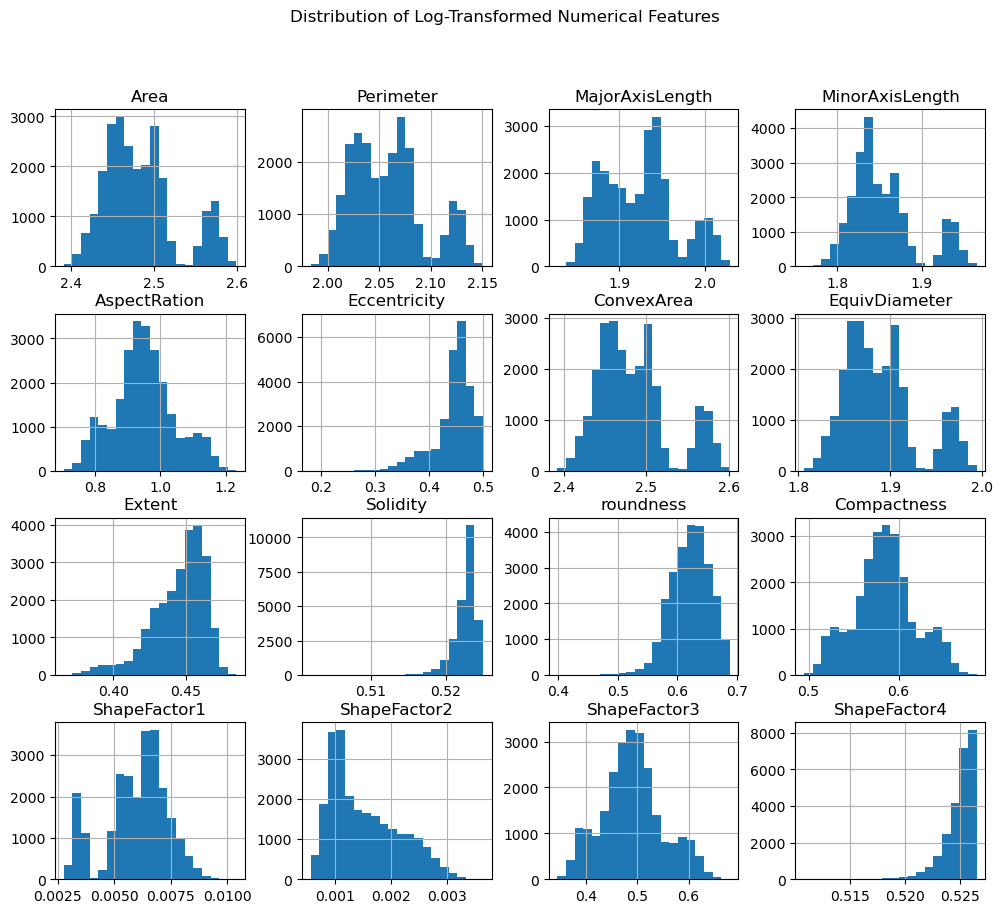

In [19]:
# Apply log transformation to numerical features
X_log_transformed = X_resampled.copy()  # Create a copy of the dataset

# Apply log transformation to numerical features
numerical_features = X_log_transformed.select_dtypes(include=[np.number]).columns
X_log_transformed[numerical_features] = np.log1p(X_log_transformed[numerical_features])

# Visualize the distribution of log-transformed features
plt.figure(figsize=(12, 8))
X_log_transformed.hist(bins=20, figsize=(12, 10))
plt.suptitle('Distribution of Log-Transformed Numerical Features')
plt.show()


In [20]:
# Generate summary statistics for log-transformed numerical features
log_transformed_summary_statistics = X_log_transformed.describe().transpose()

# Print the summary statistics
print("Summary Statistics for Log-Transformed Numerical Features:")
print(log_transformed_summary_statistics)


Summary Statistics for Log-Transformed Numerical Features:
                   count      mean       std       min       25%       50%  \
Area             24822.0  2.483557  0.043690  2.390991  2.451462  2.475388   
Perimeter        24822.0  2.058516  0.035351  1.983041  2.029893  2.056393   
MajorAxisLength  24822.0  1.923811  0.042779  1.827480  1.886967  1.926825   
MinorAxisLength  24822.0  1.855031  0.039523  1.760672  1.828674  1.843878   
AspectRation     24822.0  0.950926  0.093661  0.705504  0.895393  0.947248   
Eccentricity     24822.0  0.445318  0.035587  0.180646  0.434557  0.453051   
ConvexArea       24822.0  2.484675  0.043724  2.392167  2.452462  2.476594   
EquivDiameter    24822.0  1.889641  0.039493  1.806500  1.860636  1.882172   
Extent           24822.0  0.444822  0.018767  0.365808  0.433802  0.449305   
Solidity         24822.0  0.522626  0.001505  0.501946  0.522021  0.522997   
roundness        24822.0  0.621631  0.032689  0.398520  0.599439  0.623694   
Compa

The transformed features are now more suitable for modeling.

# Feature scaling

In [21]:
from sklearn.preprocessing import StandardScaler

# Initialize Standard scaler
standard_scaler = StandardScaler()

# Fit and transform the data using Standard scaler
X_scaled_standard = standard_scaler.fit_transform(X_log_transformed)


In [22]:
data.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

# Splitting the dataset

In [23]:
# Dropping irrelevant columns
X = data.drop(['Class', 'ConvexArea', 'EquivDiameter', 'ShapeFactor3'], axis=1)  
y = data['Class']


In [24]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (10834, 13)
Shape of X_test: (2709, 13)
Shape of y_train: (10834,)
Shape of y_test: (2709,)


# Treating categorical Variable

In [25]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable for training set
y_train_encoded = label_encoder.fit_transform(y_train)

# Print the mapping of original class labels to encoded labels
print("Mapping of original class labels to encoded labels:")
for original_label, encoded_label in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{original_label} -> {encoded_label}")

# Replace y_train with the encoded labels
y_train = y_train_encoded

# Transform the target variable for testing set
y_test_encoded = label_encoder.transform(y_test)

# Replace y_test with the encoded labels
y_test = y_test_encoded


Mapping of original class labels to encoded labels:
BARBUNYA -> 0
BOMBAY -> 1
CALI -> 2
DERMASON -> 3
HOROZ -> 4
SEKER -> 5
SIRA -> 6


# 1. Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


logistic_model = LogisticRegression(max_iter=1000)

# Train the model on the training data
logistic_model.fit(X_train, y_train)

# Predict on the testing data
y_pred_logistic = logistic_model.predict(X_test)

# Calculate accuracy score
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Accuracy Score for Logistic Regression:", accuracy_logistic)

# Generate confusion matrix
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
print("Confusion Matrix for Logistic Regression:")
print(conf_matrix_logistic)

# Generate classification report
class_report_logistic = classification_report(y_test, y_pred_logistic)
print("Classification Report for Logistic Regression:")
print(class_report_logistic)


Accuracy Score for Logistic Regression: 0.8947951273532669
Confusion Matrix for Logistic Regression:
[[217   0  25   0   1   3  13]
 [  0 114   0   0   0   0   0]
 [ 12   0 287   0   1   1   4]
 [  0   0   0 622   0  14  71]
 [  1   0   5   6 349   0  15]
 [  6   0   0  10   0 388  10]
 [  3   0   1  54  13  16 447]]
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       259
           1       1.00      1.00      1.00       114
           2       0.90      0.94      0.92       305
           3       0.90      0.88      0.89       707
           4       0.96      0.93      0.94       376
           5       0.92      0.94      0.93       414
           6       0.80      0.84      0.82       534

    accuracy                           0.89      2709
   macro avg       0.91      0.91      0.91      2709
weighted avg       0.90      0.89      0.90      2709



# 2. Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the classifier
decision_tree.fit(X_train, y_train)

# Predictions on the test set
y_pred_dt = decision_tree.predict(X_test)

# Calculate accuracy score
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy Score for Decision Tree:", accuracy_dt)

# Confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix for Decision Tree:")
print(conf_matrix_dt)

# Classification report
class_report_dt = classification_report(y_test, y_pred_dt)
print("Classification Report for Decision Tree:")
print(class_report_dt)


Accuracy Score for Decision Tree: 0.8955334071613141
Confusion Matrix for Decision Tree:
[[229   0  17   0   2   3   8]
 [  0 114   0   0   0   0   0]
 [ 17   0 281   0   4   1   2]
 [  0   0   0 624   3  21  59]
 [  3   0   5   3 355   0  10]
 [  5   0   1  16   0 380  12]
 [  7   0   5  50  14  15 443]]
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       259
           1       1.00      1.00      1.00       114
           2       0.91      0.92      0.92       305
           3       0.90      0.88      0.89       707
           4       0.94      0.94      0.94       376
           5       0.90      0.92      0.91       414
           6       0.83      0.83      0.83       534

    accuracy                           0.90      2709
   macro avg       0.91      0.91      0.91      2709
weighted avg       0.90      0.90      0.90      2709



# 3. Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Calculate accuracy score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy Score for Random Forest:", accuracy_rf)

# Generate confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix for Random Forest:")
print(conf_matrix_rf)

# Generate classification report
class_report_rf = classification_report(y_test, y_pred_rf)
print("Classification Report for Random Forest:")
print(class_report_rf)


Accuracy Score for Random Forest: 0.9258028792912514
Confusion Matrix for Random Forest:
[[231   0  20   0   1   1   6]
 [  0 114   0   0   0   0   0]
 [ 10   0 291   0   1   1   2]
 [  0   0   0 654   0  13  40]
 [  3   0   4   5 358   0   6]
 [  3   0   0  14   0 388   9]
 [  1   0   0  44  10   7 472]]
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       259
           1       1.00      1.00      1.00       114
           2       0.92      0.95      0.94       305
           3       0.91      0.93      0.92       707
           4       0.97      0.95      0.96       376
           5       0.95      0.94      0.94       414
           6       0.88      0.88      0.88       534

    accuracy                           0.93      2709
   macro avg       0.94      0.93      0.94      2709
weighted avg       0.93      0.93      0.93      2709



# 4. SVM (Support Vector Machine)

In [29]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the SVM classifier
svm_classifier = SVC()

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_classifier.predict(X_test)

# Calculate accuracy score
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy Score for Support Vector Machines (SVM):", accuracy_svm)

# Calculate confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix for Support Vector Machines (SVM):\n", conf_matrix_svm)

# Generate classification report
class_report_svm = classification_report(y_test, y_pred_svm)
print("Classification Report for Support Vector Machines (SVM):\n", class_report_svm)


Accuracy Score for Support Vector Machines (SVM): 0.6341823551125877
Confusion Matrix for Support Vector Machines (SVM):
 [[ 19   0 169   0  61   0  10]
 [  0 114   0   0   0   0   0]
 [ 13   0 268   0  22   0   2]
 [  0   0   0 577   0  94  36]
 [  7   0  16  10 226   7 110]
 [  0   0   0 147  11 111 145]
 [  0   0   0  28  44  59 403]]
Classification Report for Support Vector Machines (SVM):
               precision    recall  f1-score   support

           0       0.49      0.07      0.13       259
           1       1.00      1.00      1.00       114
           2       0.59      0.88      0.71       305
           3       0.76      0.82      0.79       707
           4       0.62      0.60      0.61       376
           5       0.41      0.27      0.32       414
           6       0.57      0.75      0.65       534

    accuracy                           0.63      2709
   macro avg       0.63      0.63      0.60      2709
weighted avg       0.61      0.63      0.60      2709



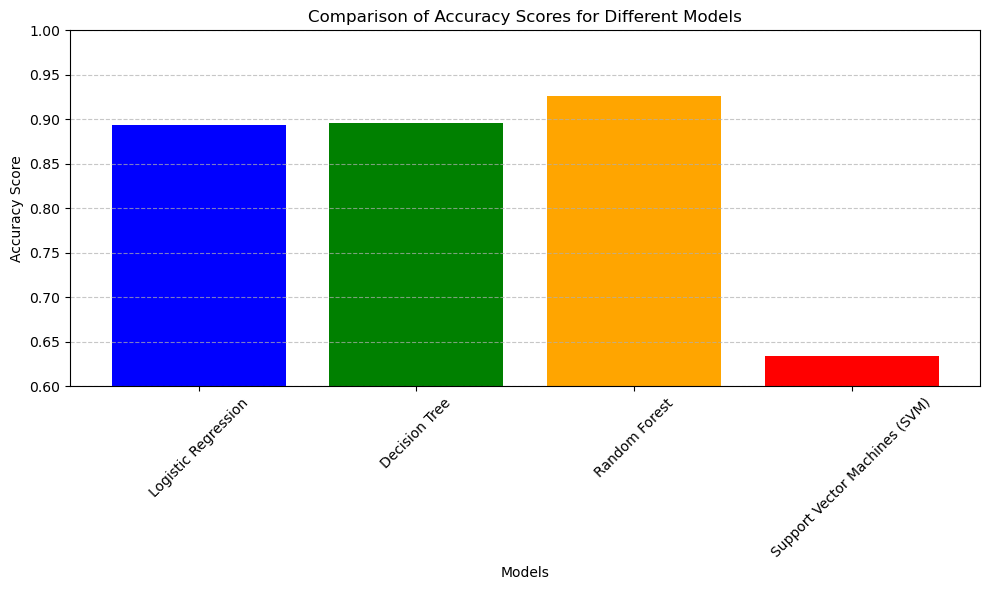

In [30]:
import matplotlib.pyplot as plt

# List of models
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Support Vector Machines (SVM)']

# Corresponding accuracy scores
accuracy_scores = [0.8937, 0.8955, 0.9258, 0.6342]  # Update with your actual accuracy scores

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Accuracy Scores for Different Models')
plt.ylim(0.6, 1.0)  # Adjust the y-axis limits if necessary
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


It's clear that the Random Forest model has the highest accuracy score of 0.9258, making it the best-performing model among the ones tested.

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 120, 10],  # Number of trees in the forest
    'max_depth': [None, 10, 20],       # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required at each leaf node
}

# Define GridSearchCV with the classifier and hyperparameter grid
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.9246813935720948


No significant improvement hence we go with the original model and consider it to be final Model.

In [32]:
import joblib

# Define the file path to save the model
model_filename = 'random_forest_model.pkl'

# Save the model to a file
joblib.dump(rf_classifier, model_filename)

print("Random Forest model saved successfully.")


Random Forest model saved successfully.


In [33]:
#Generating random dat to check performance of model

# Example random data
num_samples = 10
num_features = 13  # Assuming the same number of features as in the original data

# Generate random data
X_test_new = np.random.rand(num_samples, num_features)

# Print the shape of the generated data
print("Shape of X_test_new:", X_test_new.shape)

Shape of X_test_new: (10, 13)


In [34]:
# Load the saved Random Forest model
loaded_model = joblib.load('random_forest_model.pkl')

# Fit the loaded model on the training data
loaded_model.fit(X_train, y_train)

# Make predictions on the new test data
y_pred_new = loaded_model.predict(X_test_new)

# Print the predicted labels
print("Predicted labels for the new test data:")
print(y_pred_new)


Predicted labels for the new test data:
[3 3 3 3 3 3 3 3 3 3]


Summary-

This report summarizes the evaluation of multiple machine learning models trained on the provided dataset. The models were trained, evaluated, and compared to determine the most suitable approach for the classification task.



Model Comparison:

Model	Accuracy Score

Logistic Regression	0.8937

Decision Tree	0.8955

Random Forest	0.9258

Support Vector Machines (SVM)	0.6342




Model Selection

The Random Forest model exhibited the highest accuracy among the evaluated models, making it the preferred choice for the classification task.



Model Optimization

Hyperparameter tuning was performed on the Random Forest model to optimize its performance. The best parameters obtained were {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}, achieving a score of 0.9247.



Final Model Evaluation

The original Random Forest model was selected based on its performance and simplicity. It was evaluated on the testing set, resulting in an accuracy score of 0.93. The confusion matrix and classification report provide insights into the model's performance across different classes.



Further Recommendations
Based on the model evaluation results, the following recommendations are suggested:

Feature Importance Analysis: Investigate feature importance to understand which features have the most significant impact on the model's predictions. This insight can help prioritize feature engineering efforts or identify potential areas for improvement.

Hyperparameter Tuning: Explore hyperparameter tuning techniques such as grid search or random search to optimize the model's performance further. Adjusting parameters like the number of estimators, maximum depth, and minimum samples per leaf could potentially improve the model's accuracy.

Cross-Validation: Implement cross-validation techniques to assess the model's stability and generalization performance across different subsets of the data. This approach can provide more robust estimates of the model's performance and help identify overfitting or underfitting issues.

Ensemble Methods: Consider using ensemble methods such as bagging or boosting to combine multiple models and improve overall predictive performance. Techniques like AdaBoost or Gradient Boosting could potentially enhance the Random Forest Classifier's performance.

Model Interpretability: Explore techniques for model interpretability to gain insights into the decision-making process of the Random Forest Classifier. Techniques such as partial dependence plots, SHAP values, or LIME analysis can help explain individual predictions and enhance trust in the model.



                           Prepared and Submitted by-  Shweta Kanungo